In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
cases = pd.read_csv('WHO-COVID-19-global-data-2.csv')
cases = cases[['Date_reported','Country','New_cases','Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]
country_name = "Germany"
country_filter = cases['Country'] == country_name
cases = cases[country_filter]

In [3]:
date = cases['Date_reported'].values
deats_by_day = cases['New_deaths'].values
cases_by_day = cases['New_cases'].values

In [4]:
number_of_items = len(date)
days = np.arange(1, number_of_items+1)

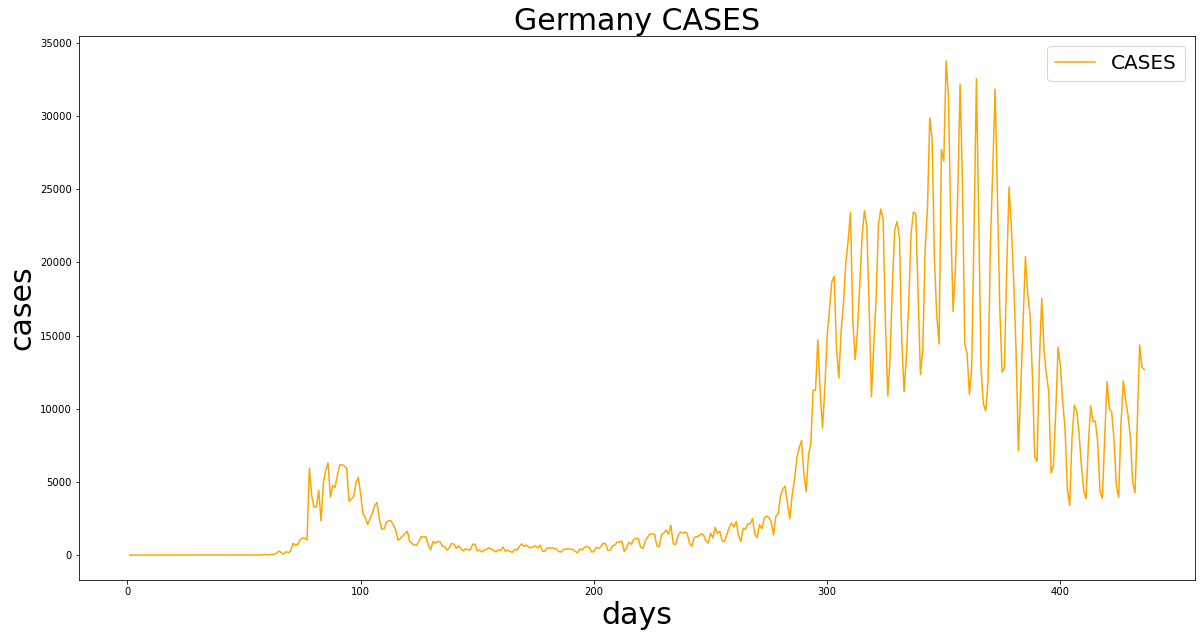

In [5]:
plt.plot(days, cases_by_day, label="CASES", color="orange")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [6]:
data = cases_by_day[54:]

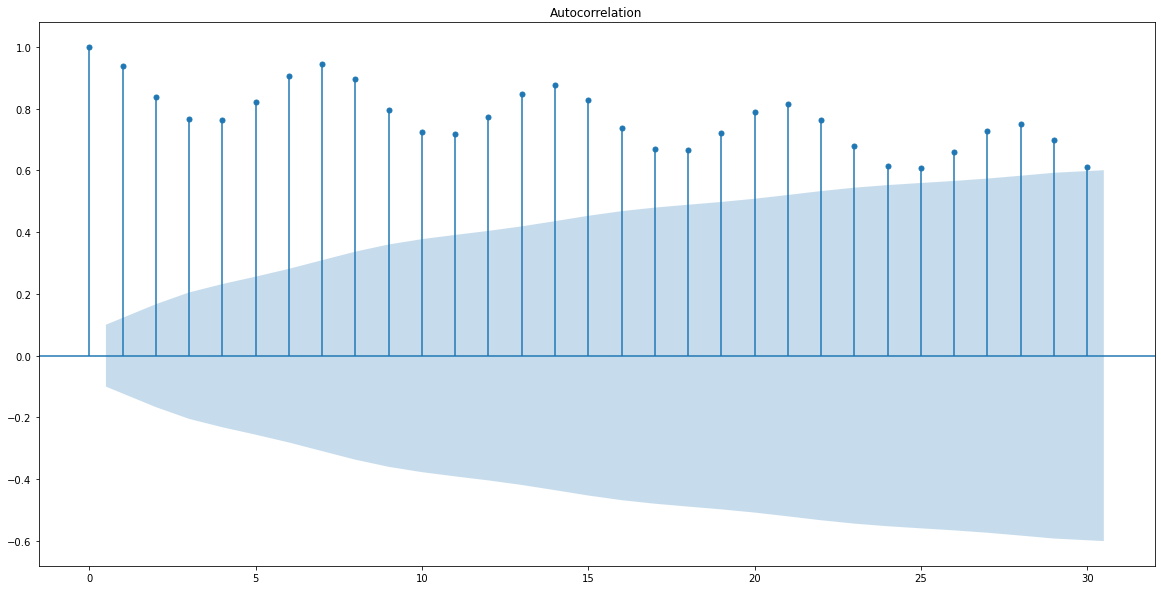

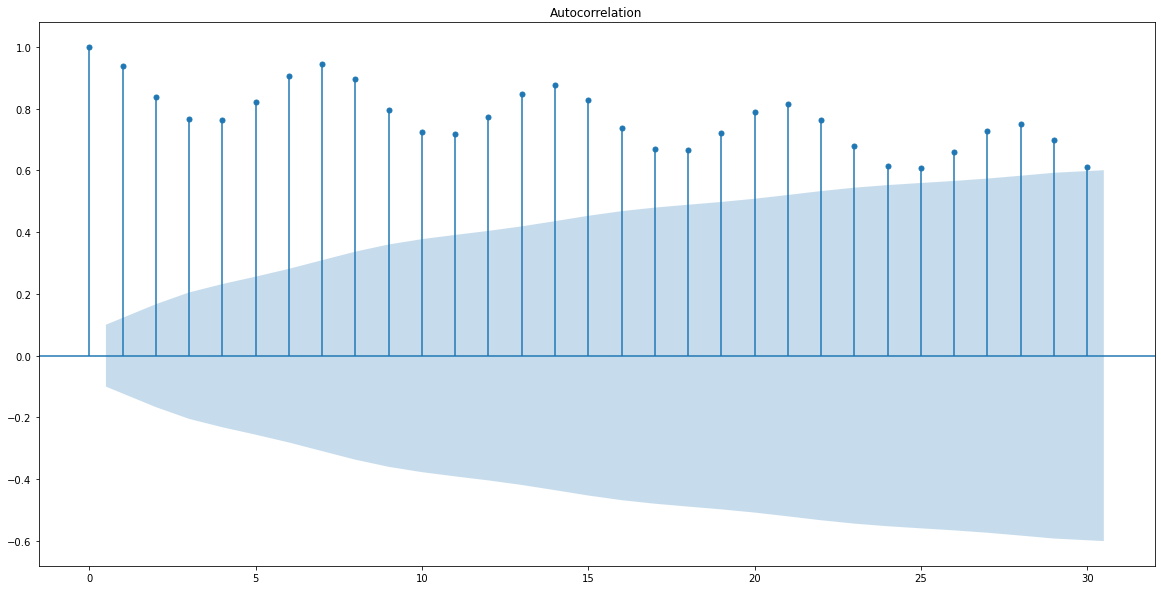

In [7]:
plot_acf(data, lags=30)

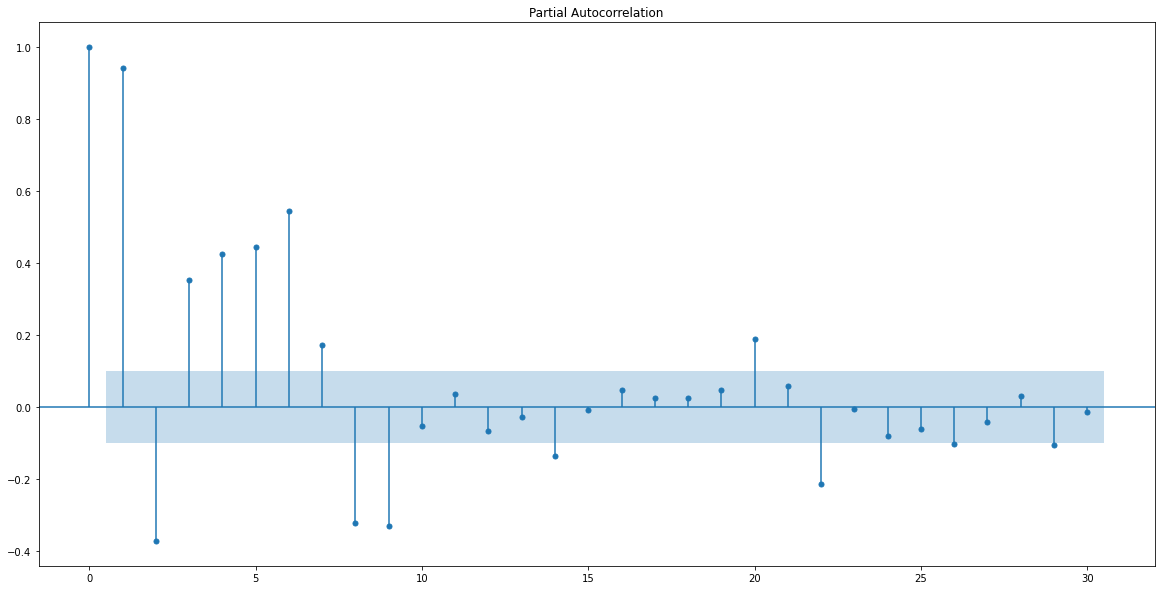

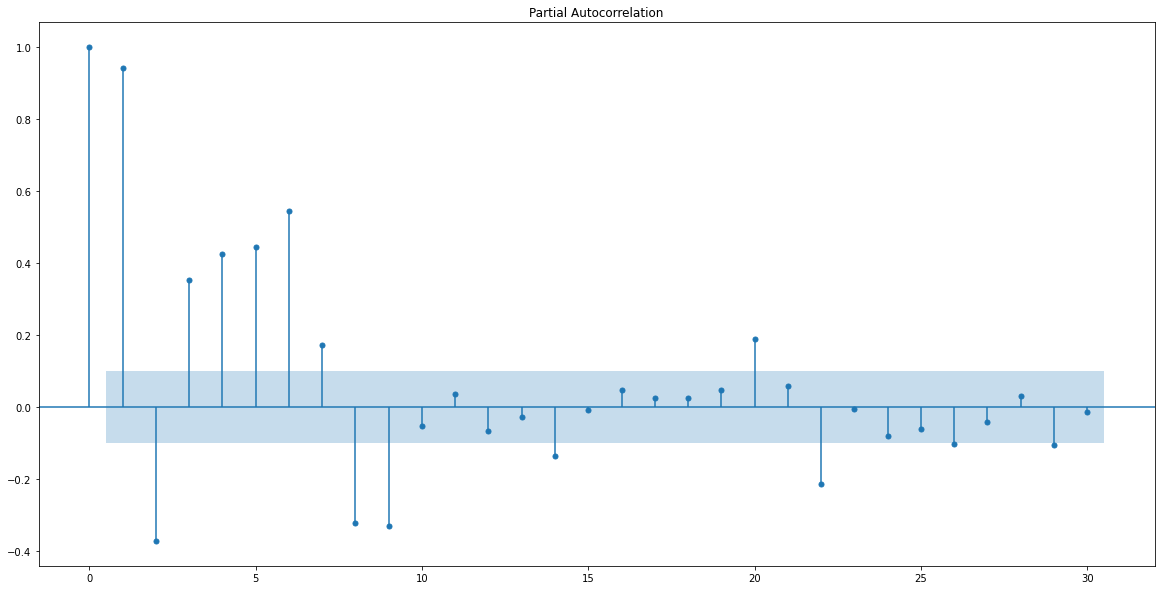

In [8]:
plot_pacf(data, lags=30)

In [9]:
lag_7_cases = data[:len(data)-7] - data[7:]

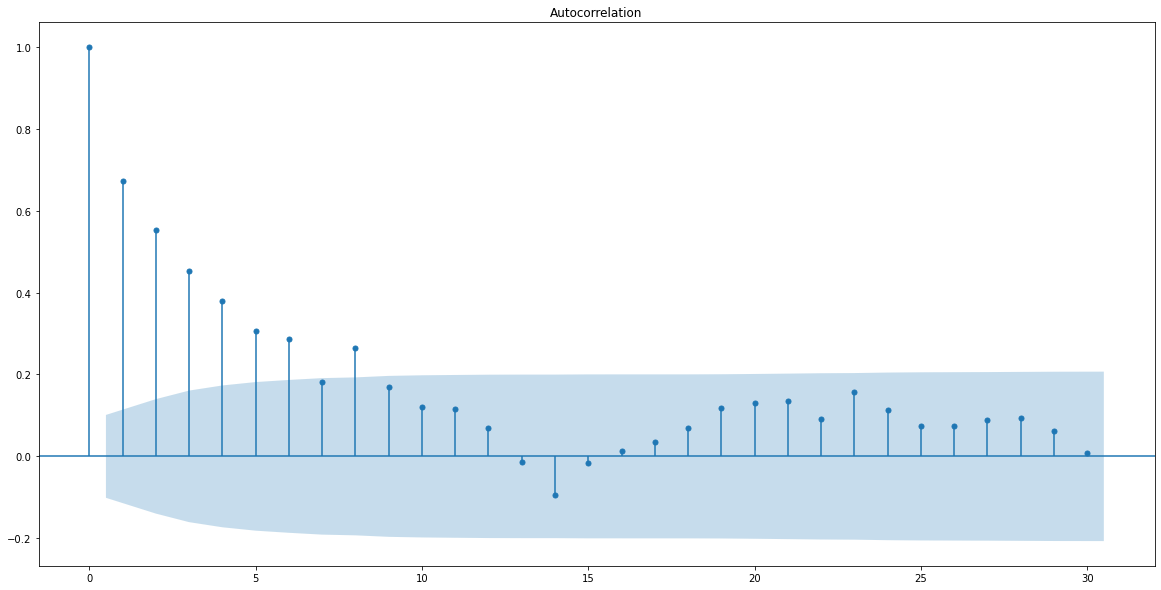

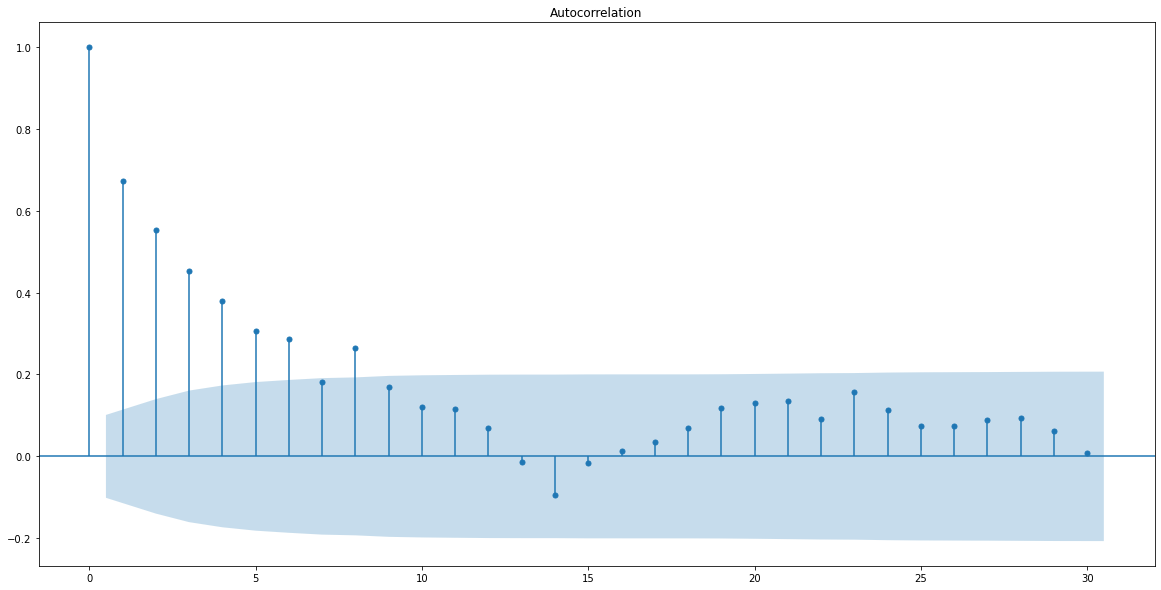

In [10]:
plot_acf(lag_7_cases, lags=30)

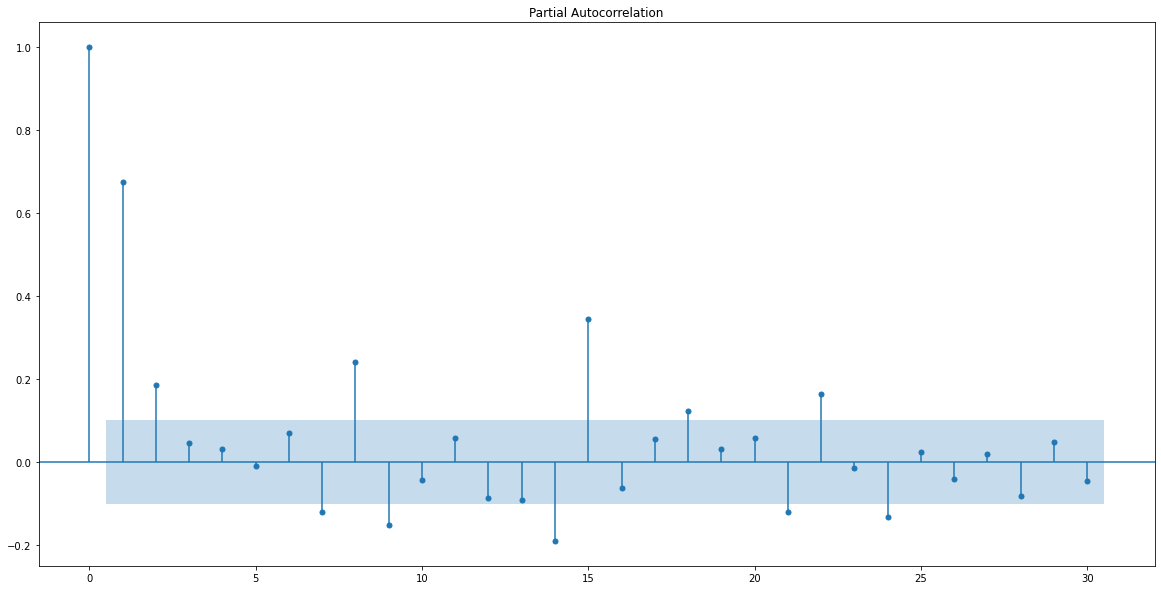

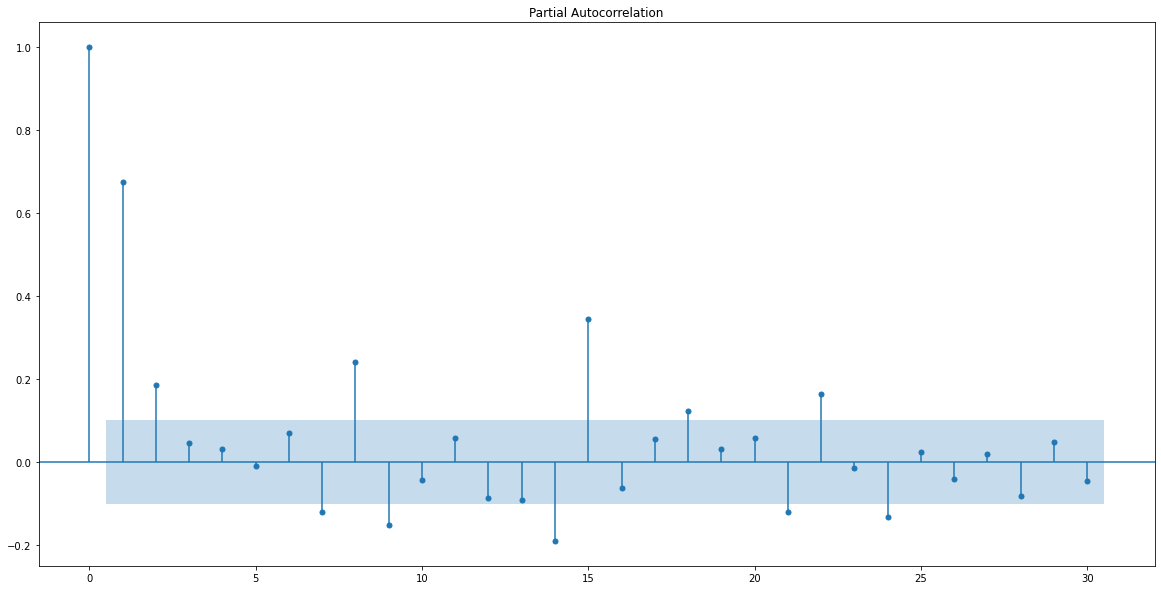

In [11]:
plot_pacf(lag_7_cases, lags=30)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(lag_7_cases, ordAer=([1, 8, 15],1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                           y   No. Observations:                  375
Model:             ARIMA([1, 8, 15], 1, 0)   Log Likelihood               -3335.856
Date:                     Sun, 28 Mar 2021   AIC                           6679.711
Time:                             23:27:30   BIC                           6695.408
Sample:                                  0   HQIC                          6685.944
                                     - 375                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2358      0.022    -10.569      0.000      -0.280      -0.192
ar.L8          0.2201      0.035      6.234      0.000       0.151       0.289
ar.L15         0.0754      0.026      2.888      0.004       0.024       0.127
sigma2        3.4e+06   9.43e+04     36.037      0.000    3.21e+06    3.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):              4618.82
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):              14.48   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predictions = model_fit.predict(301, len(lag_7_cases))

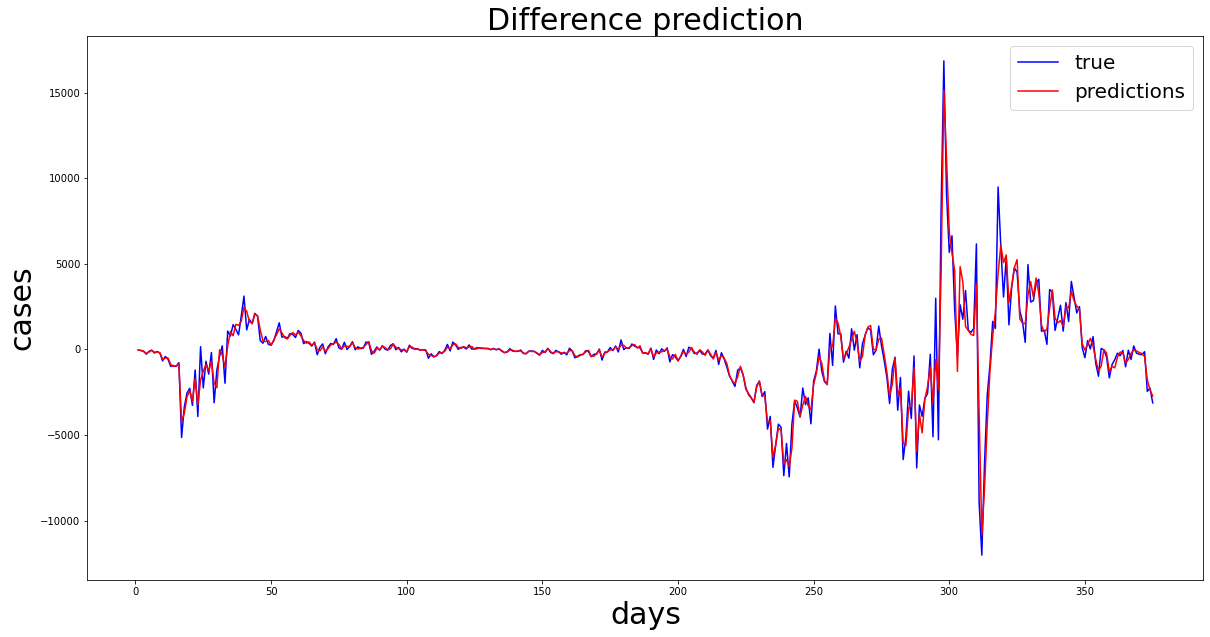

In [14]:
plt.plot(np.arange(1,len(lag_7_cases)+1), lag_7_cases, label="true", color="blue")
plt.plot(np.arange(1,len(predictions)+1), predictions, label="predictions", color="red")
plt.title("Difference prediction", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [15]:
def mape(true, pred):
    return np.mean(np.abs((true-pred)/true))*100
def mse(true, predictions):
    return np.mean((true-predictions)**2)
def rmse(true, predictions):
    return np.mean((true-predictions)**2)**0.5

In [16]:
true = data[:len(data)-7]
predictions = predictions + data[7:]

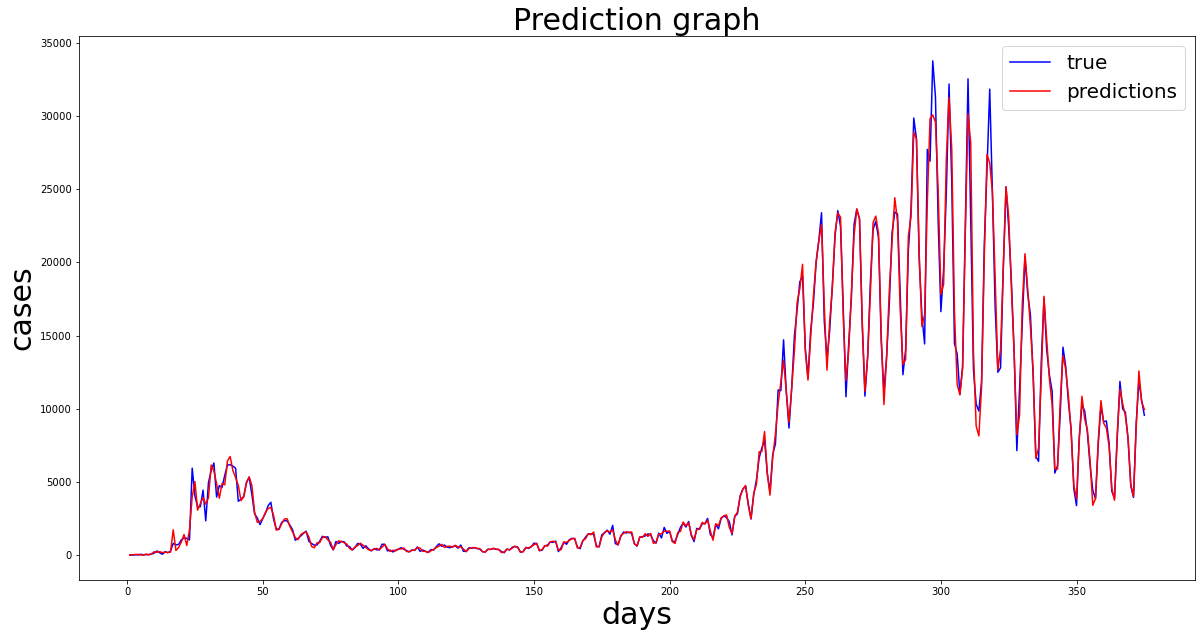

In [17]:
plt.plot(np.arange(1,len(true)+1), true, label="true", color="blue")
plt.plot(np.arange(1,len(predictions)+1), predictions, label="predictions", color="red")
plt.title("Prediction graph", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [18]:
mape(true, predictions)

13.829561768558026

In [19]:
mse(true, predictions)

525227.8983486429

In [20]:
rmse(true, predictions)

724.7260850477529